In [1]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

Using TensorFlow backend.


['/job:localhost/replica:0/task:0/device:GPU:0']

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os, json, re
from glob import glob
import numpy as np
from matplotlib import pyplot as plt
import shutil 

import tensorflow as tf
from keras.applications import ResNet50
from keras.models import Sequential, Model
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


## Helper function

In [2]:
bs=128 # batch_size

In [3]:
def get_labels(path):
    return os.listdir(path)
labels = get_labels('./data/pets')        
label_count = len(labels)
print(label_count, labels)

37 ['english_setter', 'yorkshire_terrier', 'Maine_Coon', 'leonberger', 'British_Shorthair', 'Persian', 'staffordshire_bull_terrier', 'beagle', 'pug', 'Russian_Blue', 'chihuahua', 'samoyed', 'Birman', 'Abyssinian', 'german_shorthaired', 'Sphynx', 'havanese', 'american_pit_bull_terrier', 'saint_bernard', 'pomeranian', 'basset_hound', 'Egyptian_Mau', 'Ragdoll', 'shiba_inu', 'english_cocker_spaniel', 'newfoundland', 'wheaten_terrier', 'Siamese', 'scottish_terrier', 'keeshond', 'american_bulldog', 'Bombay', 'miniature_pinscher', 'boxer', 'Bengal', 'great_pyrenees', 'japanese_chin']


In [4]:
def preprocess_input_new(x):
    img = preprocess_input(img_to_array(x))
    return array_to_img(img)

In [5]:
from keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
def preprocess_input_new(x):
    img = preprocess_input(img_to_array(x))
    return array_to_img(img)

current_dir = os.getcwd()
data_folder = "data/pets"

datagen = ImageDataGenerator(preprocessing_function=preprocess_input)


generator=datagen.flow_from_directory(
    directory=os.path.join(current_dir, data_folder),
    target_size=(224,224),
    batch_size=bs,
    classes=None,
    class_mode='categorical')

labels_map = generator.class_indices
print(labels_map)
print(generator.n)

Found 7405 images belonging to 37 classes.
{'Abyssinian': 0, 'Bengal': 1, 'Birman': 2, 'Bombay': 3, 'British_Shorthair': 4, 'Egyptian_Mau': 5, 'Maine_Coon': 6, 'Persian': 7, 'Ragdoll': 8, 'Russian_Blue': 9, 'Siamese': 10, 'Sphynx': 11, 'american_bulldog': 12, 'american_pit_bull_terrier': 13, 'basset_hound': 14, 'beagle': 15, 'boxer': 16, 'chihuahua': 17, 'english_cocker_spaniel': 18, 'english_setter': 19, 'german_shorthaired': 20, 'great_pyrenees': 21, 'havanese': 22, 'japanese_chin': 23, 'keeshond': 24, 'leonberger': 25, 'miniature_pinscher': 26, 'newfoundland': 27, 'pomeranian': 28, 'pug': 29, 'saint_bernard': 30, 'samoyed': 31, 'scottish_terrier': 32, 'shiba_inu': 33, 'staffordshire_bull_terrier': 34, 'wheaten_terrier': 35, 'yorkshire_terrier': 36}
7405


## Build model

In [9]:
conv_base=ResNet50(include_top=False, input_shape=(224, 224, 3), pooling='avg', weights='imagenet')
conv_base.trainable=False

x = conv_base.output
x = Dense(37, activation='softmax')(x)
model=Model(input=conv_base.input, outputs=x)
# model = Sequential()
# model.add(conv_base)
# model.add(Dense(37, activation='softmax'))
for layer in model.layers[:-1]:
    layer.trainable= False
model.summary()

print('Model has ', len(model.layers), 'layers')
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`
  


In [10]:
%%time
steps_per_epoch=np.ceil(7393/bs)
print(steps_per_epoch)
history = model.fit_generator(generator, steps_per_epoch=steps_per_epoch, epochs=5)
# model.save('lesson6_model.h5')

58.0
Epoch 1/5
58/58 [==============================] - 43s 743ms/step - loss: 1.5365 - acc: 0.6126
Epoch 2/5
58/58 [==============================] - 41s 701ms/step - loss: 0.4563 - acc: 0.8843
Epoch 3/5
58/58 [==============================] - 42s 726ms/step - loss: 0.3047 - acc: 0.9235
Epoch 4/5
58/58 [==============================] - 41s 715ms/step - loss: 0.2327 - acc: 0.9454
Epoch 5/5
58/58 [==============================] - 42s 722ms/step - loss: 0.1787 - acc: 0.9596
CPU times: user 3min 38s, sys: 29.2 s, total: 4min 7s
Wall time: 3min 29s


## TEST

In [11]:
# labels_map = generator.class_indices
labels_map_inv = { i: j for j, i in labels_map.items()}
print(labels_map_inv)

{0: 'Abyssinian', 1: 'Bengal', 2: 'Birman', 3: 'Bombay', 4: 'British_Shorthair', 5: 'Egyptian_Mau', 6: 'Maine_Coon', 7: 'Persian', 8: 'Ragdoll', 9: 'Russian_Blue', 10: 'Siamese', 11: 'Sphynx', 12: 'american_bulldog', 13: 'american_pit_bull_terrier', 14: 'basset_hound', 15: 'beagle', 16: 'boxer', 17: 'chihuahua', 18: 'english_cocker_spaniel', 19: 'english_setter', 20: 'german_shorthaired', 21: 'great_pyrenees', 22: 'havanese', 23: 'japanese_chin', 24: 'keeshond', 25: 'leonberger', 26: 'miniature_pinscher', 27: 'newfoundland', 28: 'pomeranian', 29: 'pug', 30: 'saint_bernard', 31: 'samoyed', 32: 'scottish_terrier', 33: 'shiba_inu', 34: 'staffordshire_bull_terrier', 35: 'wheaten_terrier', 36: 'yorkshire_terrier'}


(224, 224, 3)


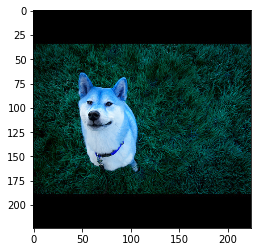

In [12]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import cv2

img_p = './data/pets/shiba_inu/shiba_inu_27.jpg'
img = cv2.imread(img_p)
img = cv2.resize(img, (224,224))
plt.imshow(img)
print(img.shape)

In [15]:
%%time 
img_arr = preprocess_input(img_to_array(img))
img_arr = img_arr.reshape((1,) + (224,224,3))

pred = model.predict(img_arr,batch_size=1)
yhat = np.argmax(pred, axis=1)
print(yhat)
print('predict ', img_p, ' as ', labels_map_inv[yhat[0]])


[33]
predict  ./data/pets/shiba_inu/shiba_inu_27.jpg  as  shiba_inu
CPU times: user 20 ms, sys: 4 ms, total: 24 ms
Wall time: 20 ms


## gradCAM

In [23]:
from keras import backend as K
def showGradCAM(model, path, idx, layer_name, resize=224):
    img = cv2.imread(path)
    img = cv2.resize(img, (resize,resize))
    x = preprocess_input(img_to_array(img))
    x = np.expand_dims(x, axis=0)
    
    # predict and get index of idx-th class
    preds = model.predict(x)
    top_n = preds[0].argsort()[-idx:][::-1]
    class_idx = top_n[idx-1]
    
    # output gradient and pool
    layer_output = model.get_layer(layer_name).output
    output = model.output[:, class_idx]
    grads = K.gradients(output, layer_output)[0]
    
    # create heatmap
    grad_function = K.function([model.input], [grads[0], layer_output[0]])
    x_grads, x_layer_output = grad_function([x])
    x_pooled_grads = np.mean(x_grads, axis=(0, 1))
    heatmap = np.dot(x_layer_output, x_pooled_grads)
    heatmap = np.maximum(heatmap,0)
    heatmap = heatmap / np.max(heatmap)
    
    # show result
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
    
    f = plt.figure()
    f.add_subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    f.add_subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
    plt.show(block=True)
    

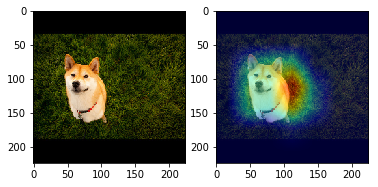

In [24]:
showGradCAM(model, './data/pets/shiba_inu/shiba_inu_27.jpg',1, 'res5c_branch2c')

## Others
flow_from_directory alternative

In [18]:
import re
from keras.utils import to_categorical
import cv2
import numpy as np
from keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.utils import shuffle

class MyImageGenerator:
    def __init__(self, src, bs):
        self.images = []
        self.src = src
        self.labels =[]
        self.label_dict={}
        self.load_image()
        self.bs = bs
        self.idx = 0
        self.next_idx = self.idx + self.bs
        
    def get_dict(self):
        return self.label_dict
    
    def get_images(self):
        return self.images
    
    def get_labels(self):
        return self.labels
    
    def load_image(self):
#         pat = r'([^/]+)_\d+.jpg$'
        
        count = -1
        folders = os.listdir(self.src)
        for folder in os.listdir(self.src):
            count += 1
            for f in os.listdir(os.path.join(self.src, folder)):
                if f == '.ipynb_checkpoints': continue
                if f.split('.')[-1] != 'jpg': continue
                
                self.images.append(os.path.join(self.src, folder, f))
                self.labels.append(count)
                
        self.images = shuffle(self.images, random_state=99)
        self.labels = shuffle(self.labels, random_state=99)
            
    def get_image(self, path, img_list):
        try:
            img=cv2.imread(path, cv2.IMREAD_COLOR)
            img=cv2.resize(img, (224,224))
            

        except Exception as e:
            return None
        
        return preprocess_input(img_to_array(img)) 

    
    def get_batch(self):
        img_list = self.images[self.idx: self.next_idx]
        lbl_list = self.labels[self.idx: self.next_idx]
        
        imgs = np.zeros((len(img_list), 224, 224, 3))
        lbls = []
        
        for i, path in enumerate(img_list):
            img = self.get_image(path, img_list)
            if not img is None:
                imgs[i, :, :, :] = img
            else:
                imgs[i, :, :, :] = imgs[i-1, :, :, :]
        
        lbls = to_categorical(lbl_list, num_classes=37)
        
        return (imgs, lbls)
    
    def generator(self):
        while True:
            tmp = self.get_batch()
            
            if self.next_idx == len(self.images):
                self.next_idx = self.bs
                self.idx = 0
            elif self.next_idx + self.bs > len(self.images):
                self.idx = self.next_idx
                self.next_idx = len(self.images)
            else:
                self.idx = self.next_idx
                self.next_idx += self.bs
                
            yield tmp
bs = 32
myImageGen = MyImageGenerator('./data/pets', bs)  


7390 7390
['./data/pets/english_cocker_spaniel/english_cocker_spaniel_166.jpg', './data/pets/scottish_terrier/scottish_terrier_185.jpg', './data/pets/Russian_Blue/Russian_Blue_187.jpg', './data/pets/Birman/Birman_28.jpg', './data/pets/pug/pug_114.jpg']
[24, 28, 9, 12, 8]
